In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm



%matplotlib inline

In [10]:
#public data from: 
#https://www.kaggle.com/lohitharcot/creditbankdata

data = pd.read_csv('data/credit-default.csv')
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [12]:
#target value

data.default.value_counts()

1    700
2    300
Name: default, dtype: int64

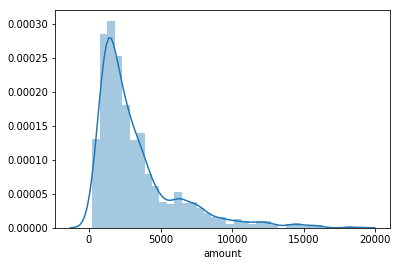

In [13]:
plt.figure()
sns.distplot(data['amount'])
plt.show()

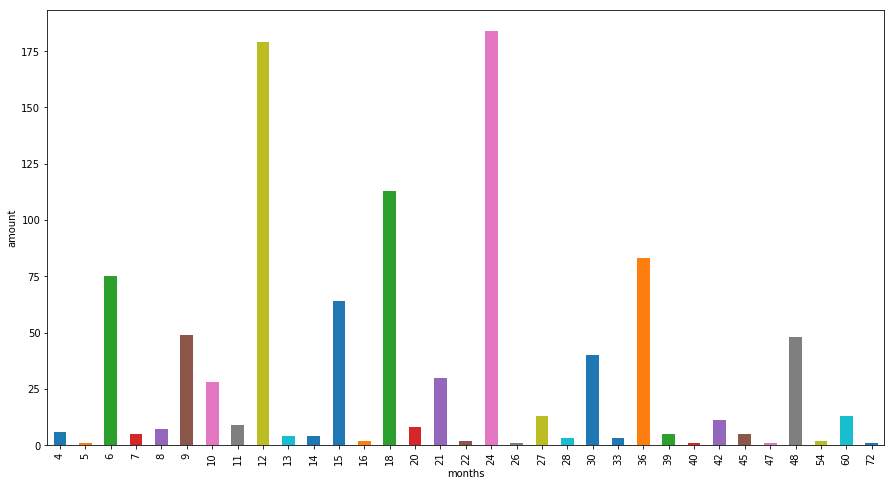

In [14]:
#split in groups afterwards

plt.figure(figsize=(15,8))
data.months_loan_duration.value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('months')
plt.ylabel('amount')
plt.show()

In [15]:
data.credit_history.value_counts()

repaid                    530
critical                  293
delayed                    88
fully repaid this bank     49
fully repaid               40
Name: credit_history, dtype: int64

In [16]:
correlation = data.corr('pearson')
correlation

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents
months_loan_duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,0.214927,-0.023834
amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.154739,0.017142
installment_rate,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,0.072404,-0.071207
residence_history,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.002967,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,-0.091127,0.118201
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,-0.045732,0.109667
default,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,1.000000,-0.003015
dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,-0.003015,1.000000


In [17]:
data.skew()

months_loan_duration    1.094184
amount                  1.949628
installment_rate       -0.531348
residence_history      -0.272570
age                     1.020739
existing_credits        1.272576
default                 0.874183
dependents              1.909445
dtype: float64

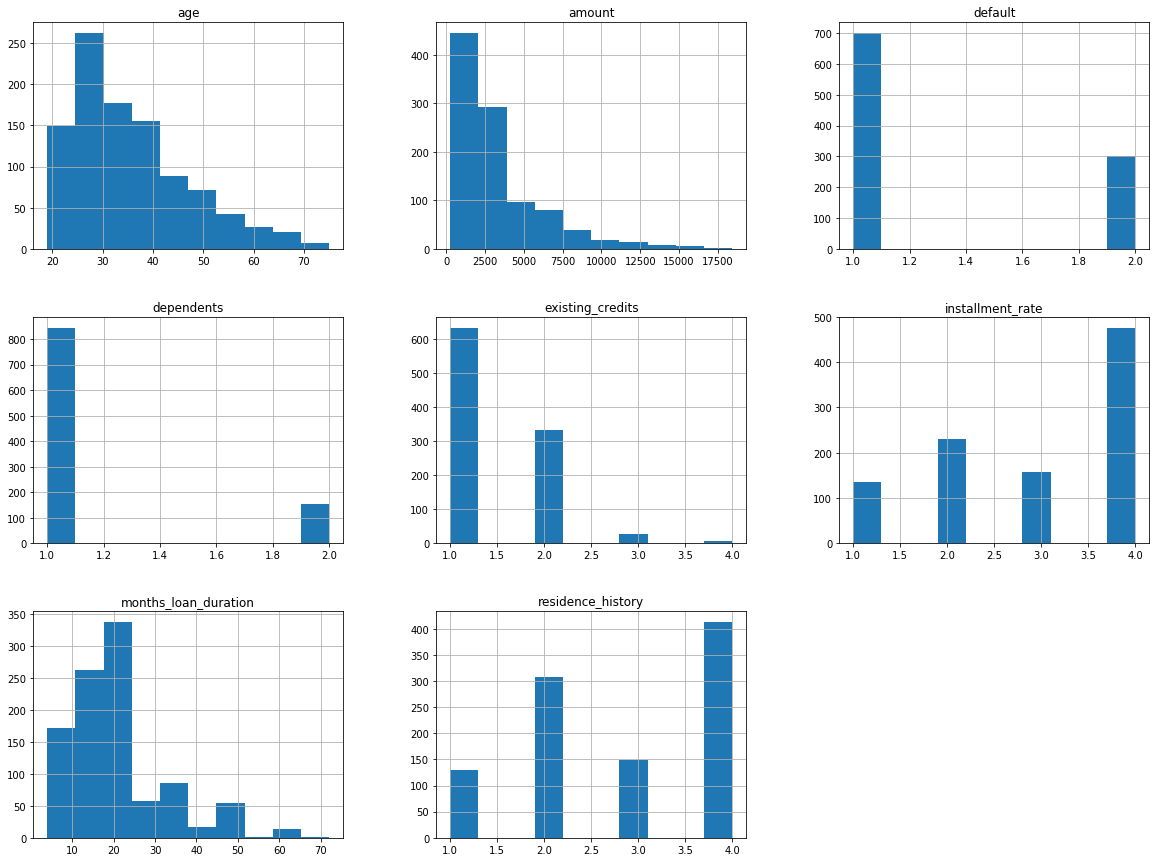

In [18]:
data.hist(figsize=(20,15))
plt.show()

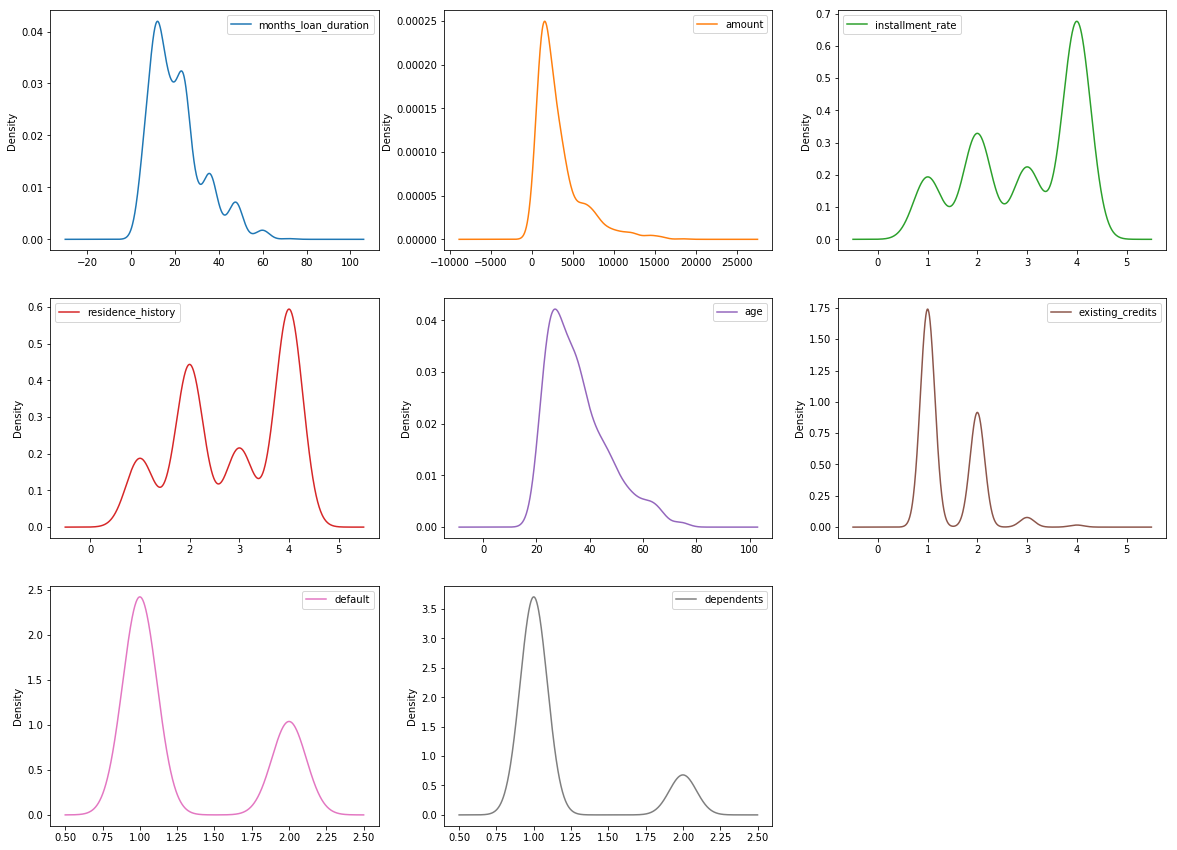

In [19]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex= False, figsize = (20,15))
plt.show()

In [20]:
data.employment_length.value_counts()

1 - 4 yrs     339
> 7 yrs       253
4 - 7 yrs     174
0 - 1 yrs     172
unemployed     62
Name: employment_length, dtype: int64

In [21]:
data.loc[(data['credit_history'] == 'fully repaid')].loc[data['employment_length'] == 'unemployed']['default']

212    2
Name: default, dtype: int64

In [22]:
data['accepted'] = data['default'].map(lambda x : 0 if x == 2 else 1)
data['accepted'].value_counts()

1    700
0    300
Name: accepted, dtype: int64

In [23]:
data = data.drop('default', axis = 1)

In [24]:
data.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'dependents',
       'telephone', 'foreign_worker', 'job', 'accepted'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
job                     1000 non-null object
a

# data transformation

In [26]:
#transform vars in order to create more informative ones

In [27]:
bins = [0,24,34,49,999]
groups = ['under 25','25-34','35-49','50+']
data['age_group'] = pd.cut(data['age'],bins,labels = groups)


In [28]:
bins = [0,12,24,36,48,99]
groups = [1,2,3,4,5]
data['loan_dur'] = pd.cut(data['months_loan_duration'],bins,labels = groups)

In [29]:
data[data.credit_history == 'critical']['accepted'].value_counts()

1    243
0     50
Name: accepted, dtype: int64

In [30]:
# replace cat vars into numbers when there is information in the order

data = data.replace({'checking_balance' : {'unknown' : 0, '< 0 DM' : 1, '1 - 200 DM' : 2, '> 200 DM' : 3},
                             
                            'savings_balance' : {'unknown' : 0, '< 100 DM' : 1, '101 - 500 DM' : 2,
                                                 '501 - 1000 DM' : 3, '> 1000 DM' : 4}, 
                            'employment_length' : {'unemployed' : 0, '0 - 1 yrs' : 1, '1 - 4 yrs' : 2, '4 - 7 yrs' : 3,
                                                   '> 7 yrs' : 4},
                            'telephone' : {'none' : 0, 'Yes' : 1},
                            'foreign_worker' : {'yes' : 0, 'no' : 1}}
                            )

In [31]:
data = data.drop(['months_loan_duration', 'age'], axis = 1)

In [32]:
data.columns

Index(['checking_balance', 'credit_history', 'purpose', 'amount',
       'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'installment_plan', 'housing', 'existing_credits', 'dependents',
       'telephone', 'foreign_worker', 'job', 'accepted', 'age_group',
       'loan_dur'],
      dtype='object')

# statistical modeling

In [33]:
#information value metrics
#good_person == 1, bad_person == 0
#predictive power 0.02 to 0.1 weak, 0.1 to 0.3 medium, 0.3 to 0.5 strong and >0.5 suspicious or too good predictor

# Calculation of IV  metrics
def IV_calc(data,var):
    if data[var].dtypes == "object":
        dataf = data.groupby([var])['accepted'].agg(['count','sum'])
        dataf.columns = ["Total","good"]    
        dataf["bad"] = dataf["Total"] - dataf["good"]
        dataf["good_per"] = dataf["good"]/dataf["good"].sum()
        dataf["bad_per"] = dataf["bad"]/dataf["bad"].sum()
        dataf["I_V"] = (dataf["bad_per"] - dataf["good_per"]) * np.log(dataf["bad_per"]/dataf["good_per"])
        return dataf
    else:
        data['bin_var'] = pd.qcut(data[var].rank(method='first'),10)
        dataf = data.groupby(['bin_var'])['accepted'].agg(['count','sum'])
        dataf.columns = ["Total","good"]    
        dataf["bad"] = dataf["Total"] - dataf["good"]
        dataf["good_per"] = dataf["good"]/dataf["good"].sum()
        dataf["bad_per"] = dataf["bad"]/dataf["bad"].sum()
        dataf["I_V"] = (dataf["bad_per"] - dataf["good_per"]) * np.log(dataf["bad_per"]/dataf["good_per"])
        return dataf

In [34]:
print ("\n\nInformation Value by descending order\n")

discrete_columns = ['credit_history', 'purpose', 'personal_status', 'other_debtors',
                    'property', 'installment_plan', 'housing', 'telephone', 'job',
                    'loan_dur', 'age_group']

continuous_columns = ['checking_balance', 'amount', 'savings_balance', 'employment_length',
                      'installment_rate', 'residence_history', 'existing_credits',
                      'dependents', 'foreign_worker']

total_columns = discrete_columns + continuous_columns

# List of IV values
Iv_list = []
for col in total_columns:
    assigned_data =  IV_calc(data = data,var = col)
    iv_val = round(assigned_data["I_V"].sum(),3)
    dt_type = data[col].dtypes
    Iv_list.append((iv_val,col,dt_type))

Iv_list = sorted(Iv_list,reverse = True)

for i in range(len(Iv_list)):
    print (Iv_list[i][0],",",Iv_list[i][1],",type =",Iv_list[i][2])



Information Value by descending order

0.664 , checking_balance ,type = int64
0.293 , credit_history ,type = object
0.244 , loan_dur ,type = category
0.171 , savings_balance ,type = int64
0.169 , purpose ,type = object
0.113 , property ,type = object
0.113 , amount ,type = int64
0.101 , age_group ,type = category
0.098 , existing_credits ,type = int64
0.092 , employment_length ,type = int64
0.083 , housing ,type = object
0.062 , installment_rate ,type = int64
0.059 , foreign_worker ,type = int64
0.058 , installment_plan ,type = object
0.049 , residence_history ,type = int64
0.045 , personal_status ,type = object
0.034 , dependents ,type = int64
0.032 , other_debtors ,type = object
0.009 , job ,type = object
0.006 , telephone ,type = object


In [35]:
discrete_columns = ['credit_history', 'purpose', 'personal_status', 'other_debtors',
                    'property', 'installment_plan', 'housing', 'telephone', 'job',
                    'loan_dur', 'age_group']

data_dum = pd.get_dummies(data[discrete_columns], drop_first=True)
data_dum.shape

(1000, 36)

In [36]:
data_con = data[continuous_columns]
data_con.shape

(1000, 9)

In [37]:
data_dummied = pd.concat([data_con, data_dum], axis = 1)
data_dummied.shape

(1000, 45)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(data_dummied,data['accepted'],
                                                 test_size = 0.3, 
                                                 random_state=42)

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [39]:
x_train.columns

Index(['checking_balance', 'amount', 'savings_balance', 'employment_length',
       'installment_rate', 'residence_history', 'existing_credits',
       'dependents', 'foreign_worker', 'credit_history_delayed',
       'credit_history_fully repaid', 'credit_history_fully repaid this bank',
       'credit_history_repaid', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education', 'purpose_furniture',
       'purpose_others', 'purpose_radio/tv', 'purpose_repairs',
       'purpose_retraining', 'personal_status_female',
       'personal_status_married male', 'personal_status_single male',
       'other_debtors_guarantor', 'other_debtors_none', 'property_other',
       'property_real estate', 'property_unknown/none',
       'installment_plan_none', 'installment_plan_stores', 'housing_own',
       'housing_rent', 'telephone_yes', 'job_skilled employee',
       'job_unemployed non-resident', 'job_unskilled resident', 'loan_dur_2',
       'loan_dur_3', 

In [40]:
# Logistic Regression

       
       
remove_cols_insig = ['installment_plan_stores', 'housing_rent', 'purpose_others', 'job_unskilled resident', 
                     'loan_dur_2', 'purpose_domestic appliances', 'purpose_repairs', 'other_debtors_none',
                     'job_skilled employee', 'property_unknown/none','residence_history',
                     'personal_status_married male', 'personal_status_female', 'dependents', 'age_group_25-34',
                    'purpose_furniture','purpose_retraining','other_debtors_guarantor','job_unemployed non-resident',
                    'employment_length','loan_dur_3','savings_balance', 'property_other', 'installment_plan_none',
                    'credit_history_delayed','existing_credits','loan_dur_4','purpose_radio/tv','telephone_yes',
                    'property_real estate']

remove_cols = list(set(remove_cols_insig))

In [41]:
logistic_model = sm.Logit(y_train,sm.add_constant(x_train.drop(remove_cols, axis = 1))).fit()
print (logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.498756
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               accepted   No. Observations:                  700
Model:                          Logit   Df Residuals:                      684
Method:                           MLE   Df Model:                           15
Date:                Mon, 22 Oct 2018   Pseudo R-squ.:                  0.1819
Time:                        14:21:20   Log-Likelihood:                -349.13
converged:                       True   LL-Null:                       -426.75
                                        LLR p-value:                 2.179e-25
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.0300      

In [42]:
# Calculation of VIF
print ("\nVariance Inflation Factor")
cnames = x_train.drop(remove_cols,axis=1).columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train.drop(remove_cols,axis=1)[yvar],sm.add_constant(x_train.drop(remove_cols,axis=1)[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
checking_balance 1.056
amount 1.367
installment_rate 1.173
foreign_worker 1.041
credit_history_fully repaid 1.127
credit_history_fully repaid this bank 1.097
credit_history_repaid 1.21
purpose_car (new) 1.109
purpose_car (used) 1.168
purpose_education 1.054
personal_status_single male 1.154
housing_own 1.089
loan_dur_5 1.14
age_group_35-49 1.157
age_group_50+ 1.126


# backward elimination methodology

In [43]:
#this is the baseline to improve the model getting rid of most insignificant vars and vars with VIF > 5, 
#an iterative process finishing when no p>0.05 and VIF<5 for all vars
#log-likelihood (AIC) will decrease 

In [44]:
y_pred = pd.DataFrame(logistic_model.predict(sm.add_constant(x_train.drop(remove_cols,axis=1))))
y_pred.columns = ["probs"]
#both = pd.concat([y_train.reset_index(drop=True),y_pred],axis=1)

both = pd.concat([y_train,y_pred],axis=1)

zeros = both[['accepted','probs']][both['accepted']==0]
ones = both[['accepted','probs']][both['accepted']==1]

def df_crossjoin(df1, df2, **kwargs):
    df1['_tmpkey'] = 1
    df2['_tmpkey'] = 1
    res = pd.merge(df1, df2, on='_tmpkey', **kwargs).drop('_tmpkey', axis=1)
    res.index = pd.MultiIndex.from_product((df1.index, df2.index))
    df1.drop('_tmpkey', axis=1, inplace=True)
    df2.drop('_tmpkey', axis=1, inplace=True)
    return res

joined_data = df_crossjoin(ones,zeros)

joined_data['concordant_pair'] = 0
joined_data.loc[joined_data['probs_x'] > joined_data['probs_y'],'concordant_pair'] =1
joined_data['discordant_pair'] = 0
joined_data.loc[joined_data['probs_x'] < joined_data['probs_y'],'discordant_pair'] =1
joined_data['tied_pair'] = 0           
joined_data.loc[joined_data['probs_x'] == joined_data['probs_y'],'tied_pair'] =1 
p_conc = (sum(joined_data['concordant_pair'])*1.0 )/ (joined_data.shape[0])     
p_disc =  (sum(joined_data['discordant_pair'])*1.0 )/ (joined_data.shape[0])
   

c_statistic = 0.5 + (p_conc - p_disc)/2.0           
print ("\nC-statistic:",round(c_statistic,4))


C-statistic: 0.7856


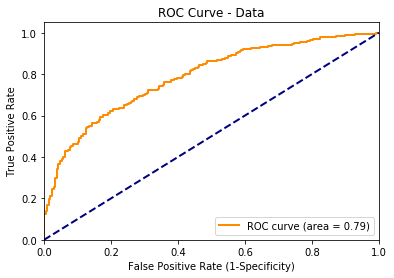

In [45]:
# ROC & AUC

from sklearn import metrics
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(both['accepted'],both['probs'], pos_label=1)

roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Data')
plt.legend(loc="lower right")
plt.show()

In [46]:
# Tuning for threshold
for i in list(np.arange(0,1,0.1)):
    both["y_pred"] = 0
    both.loc[both["probs"] > i, 'y_pred'] = 1      
    print ("Threshold",i,"Train Accuracy:",round(accuracy_score(both['accepted'],both['y_pred']),4))

# Implement best threshold on train data
both["y_pred"] = 0
both.loc[both["probs"] > 0.5, 'y_pred'] = 1      
print ("\nTrain Confusion Matrix\n\n",pd.crosstab(both['accepted'],both['y_pred'],rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nTrain Accuracy:",round(accuracy_score(both['accepted'],both['y_pred']),4))

# Predicting test output
y_pred_test = pd.DataFrame(logistic_model.predict(sm.add_constant(x_test.drop(remove_cols,axis=1))))
y_pred_test.columns = ["probs"]

#both_test = pd.concat([y_test.reset_index(drop=True),y_pred_test],axis=1)
both_test = pd.concat([y_test,y_pred_test],axis=1)
both_test["y_pred"] = 0
both_test.loc[both_test["probs"] > 0.5, 'y_pred'] = 1      
print ("\nTest Confusion Matrix\n\n",pd.crosstab(both_test['accepted'],both_test['y_pred'],rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nTest Accuracy:",round(accuracy_score(both_test['accepted'],both_test['y_pred']),4))


Threshold 0.0 Train Accuracy: 0.7014
Threshold 0.1 Train Accuracy: 0.7029
Threshold 0.2 Train Accuracy: 0.7186
Threshold 0.30000000000000004 Train Accuracy: 0.7286
Threshold 0.4 Train Accuracy: 0.74
Threshold 0.5 Train Accuracy: 0.7614
Threshold 0.6000000000000001 Train Accuracy: 0.7443
Threshold 0.7000000000000001 Train Accuracy: 0.7057
Threshold 0.8 Train Accuracy: 0.64
Threshold 0.9 Train Accuracy: 0.4614

Train Confusion Matrix

 Predicted   0    1
Actual            
0          86  123
1          44  447

Train Accuracy: 0.7614

Test Confusion Matrix

 Predicted   0    1
Actual            
0          27   64
1          21  188

Test Accuracy: 0.7167


# random forest

In [47]:
# Random Forest - Scikit Learn
x_train,x_test,y_train,y_test = train_test_split(data_dummied,data['accepted'],
                                                 test_size = 0.3, 
                                                 random_state=42)

In [48]:

           

rf_fit = RandomForestClassifier(n_estimators=1000,criterion="gini",max_depth=100,min_samples_split=3,
                                min_samples_leaf=2)
rf_fit.fit(x_train,y_train)           

print ("\nRandom Forest - Train Confusion Matrix\n\n",pd.crosstab(y_train,rf_fit.predict(x_train),
                                                                  rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Train accuracy",round(accuracy_score(y_train,rf_fit.predict(x_train)),3))

print ("\n\nRandom Forest - Test Confusion Matrix\n\n",pd.crosstab(y_test,rf_fit.predict(x_test),
                                                                   rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Test accuracy",round(accuracy_score(y_test,rf_fit.predict(x_test)),3))



print ("Testing accuracy:",round(accuracy_score(y_test, rf_fit.predict(x_test)),4))
print ("\nComplete report of Testing data\n",classification_report(y_test, rf_fit.predict(x_test)))




Random Forest - Train Confusion Matrix

 Predicted    0    1
Actual             
0          177   32
1            0  491

Random Forest - Train accuracy 0.954


Random Forest - Test Confusion Matrix

 Predicted   0    1
Actual            
0          25   66
1           9  200

Random Forest - Test accuracy 0.75
Testing accuracy: 0.75

Complete report of Testing data
               precision    recall  f1-score   support

           0       0.74      0.27      0.40        91
           1       0.75      0.96      0.84       209

   micro avg       0.75      0.75      0.75       300
   macro avg       0.74      0.62      0.62       300
weighted avg       0.75      0.75      0.71       300



In [49]:
# Grid Search
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

pipeline = Pipeline([
        ('clf',RandomForestClassifier(criterion='gini'))  ])

parameters = {
        'clf__n_estimators':(1000,2000,3000),
        'clf__max_depth':(100,200,300),
        'clf__min_samples_split':(2,3),
        'clf__min_samples_leaf':(1,2)  }

grid_search = GridSearchCV(pipeline,parameters,n_jobs=-1,cv=5,verbose=1,scoring='accuracy')
grid_search.fit(x_train,y_train)


print ('Best Training score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(x_test)

print ("Testing accuracy:",round(accuracy_score(y_test, predictions),4))
print ("\nComplete report of Testing data\n",classification_report(y_test, predictions))

print ("\n\nRandom Forest Grid Search- Test Confusion Matrix\n\n",
       pd.crosstab(y_test, predictions,rownames = ["Actual"],colnames = ["Predicted"]))      



Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  8.4min finished


Best Training score: 0.766
Best parameters set:
	clf__max_depth: 100
	clf__min_samples_leaf: 1
	clf__min_samples_split: 3
	clf__n_estimators: 3000
Testing accuracy: 0.7433

Complete report of Testing data
               precision    recall  f1-score   support

           0       0.69      0.27      0.39        91
           1       0.75      0.95      0.84       209

   micro avg       0.74      0.74      0.74       300
   macro avg       0.72      0.61      0.62       300
weighted avg       0.73      0.74      0.70       300



Random Forest Grid Search- Test Confusion Matrix

 Predicted   0    1
Actual            
0          25   66
1          11  198


In [50]:
# Variable Importance chart

rf_fit = RandomForestClassifier(n_estimators=2000,criterion="gini",
                                max_depth=100,min_samples_split=3,min_samples_leaf=1)
rf_fit.fit(x_train,y_train)   

importances = rf_fit.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_fit.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

colnames = list(x_train.columns)
# Print the feature ranking
print("\nFeature ranking:\n")
for f in range(x_train.shape[1]):
    print ("Feature",indices[f],",",colnames[indices[f]],round(importances[indices[f]],4))



Feature ranking:

Feature 1 , amount 0.1331
Feature 0 , checking_balance 0.0958
Feature 3 , employment_length 0.0567
Feature 4 , installment_rate 0.0446
Feature 2 , savings_balance 0.0443
Feature 5 , residence_history 0.0432
Feature 13 , purpose_car (new) 0.0257
Feature 6 , existing_credits 0.0252
Feature 40 , loan_dur_4 0.0242
Feature 34 , telephone_yes 0.0234
Feature 12 , credit_history_repaid 0.0219
Feature 42 , age_group_25-34 0.0218
Feature 30 , installment_plan_none 0.0218
Feature 38 , loan_dur_2 0.0217
Feature 10 , credit_history_fully repaid 0.0211
Feature 32 , housing_own 0.0207
Feature 28 , property_real estate 0.0203
Feature 27 , property_other 0.0202
Feature 43 , age_group_35-49 0.0198
Feature 24 , personal_status_single male 0.0196
Feature 35 , job_skilled employee 0.0193
Feature 19 , purpose_radio/tv 0.0192
Feature 22 , personal_status_female 0.0182
Feature 39 , loan_dur_3 0.0181
Feature 29 , property_unknown/none 0.0172
Feature 11 , credit_history_fully repaid this bank

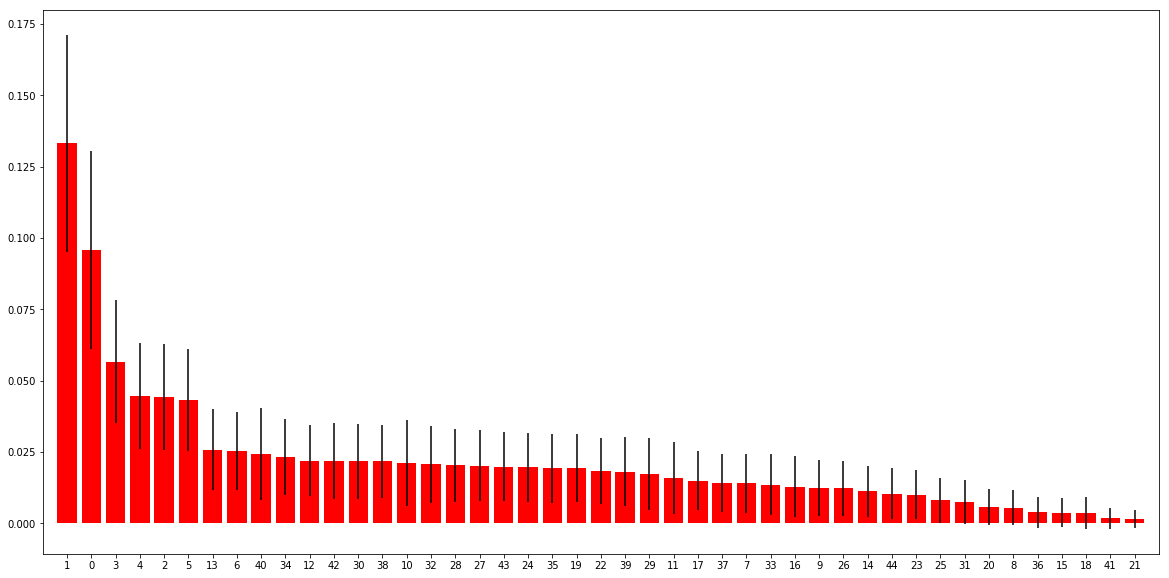

In [51]:
plt.figure(figsize=(20,10))
#plt.title("Variable importance")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

# tree based learning models

In [52]:
x_train,x_test,y_train,y_test = train_test_split(data_dummied,data['accepted'],
                                                 test_size = 0.3, 
                                                 random_state=42)


# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dt_fit.fit(x_train,y_train)

print ("\nDecision Tree - Train Confusion Matrix\n\n",pd.crosstab(y_train,dt_fit.predict(x_train),
                                                                  rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nDecision Tree - Train accuracy:",round(accuracy_score(y_train,dt_fit.predict(x_train)),3))
print ("\nDecision Tree - Train Classification Report\n",classification_report(y_train,dt_fit.predict(x_train)))

print ("\n\nDecision Tree - Test Confusion Matrix\n\n",pd.crosstab(y_test,dt_fit.predict(x_test),
                                                                   rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nDecision Tree - Test accuracy:",round(accuracy_score(y_test,dt_fit.predict(x_test)),3))
print ("\nDecision Tree - Test Classification Report\n",classification_report(y_test,dt_fit.predict(x_test)))


Decision Tree - Train Confusion Matrix

 Predicted   0    1
Actual            
0          98  111
1          42  449

Decision Tree - Train accuracy: 0.781

Decision Tree - Train Classification Report
               precision    recall  f1-score   support

           0       0.70      0.47      0.56       209
           1       0.80      0.91      0.85       491

   micro avg       0.78      0.78      0.78       700
   macro avg       0.75      0.69      0.71       700
weighted avg       0.77      0.78      0.77       700



Decision Tree - Test Confusion Matrix

 Predicted   0    1
Actual            
0          21   70
1          20  189

Decision Tree - Test accuracy: 0.7

Decision Tree - Test Classification Report
               precision    recall  f1-score   support

           0       0.51      0.23      0.32        91
           1       0.73      0.90      0.81       209

   micro avg       0.70      0.70      0.70       300
   macro avg       0.62      0.57      0.56       300

In [53]:
# Bagging Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

#define the object
dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42,
                                class_weight = {0:0.5,1:0.5})

#define the ensemble method for using with the object
bag_fit = BaggingClassifier(base_estimator= dt_fit,n_estimators=3000,max_samples=0.67,max_features=1.0,
                            bootstrap=True,bootstrap_features=True,n_jobs=-1,random_state=42)

bag_fit.fit(x_train, y_train)

print ("\nBagging - Train Confusion Matrix\n\n",pd.crosstab(y_train,bag_fit.predict(x_train),
                                                            rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nBagging- Train accuracy",round(accuracy_score(y_train,bag_fit.predict(x_train)),3))
print ("\nBagging  - Train Classification Report\n",classification_report(y_train,bag_fit.predict(x_train)))

print ("\n\nBagging - Test Confusion Matrix\n\n",pd.crosstab(y_test,bag_fit.predict(x_test),
                                                             rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nBagging - Test accuracy",round(accuracy_score(y_test,bag_fit.predict(x_test)),3))
print ("\nBagging - Test Classification Report\n",classification_report(y_test,bag_fit.predict(x_test)))




Bagging - Train Confusion Matrix

 Predicted   0    1
Actual            
0          85  124
1           0  491

Bagging- Train accuracy 0.823

Bagging  - Train Classification Report
               precision    recall  f1-score   support

           0       1.00      0.41      0.58       209
           1       0.80      1.00      0.89       491

   micro avg       0.82      0.82      0.82       700
   macro avg       0.90      0.70      0.73       700
weighted avg       0.86      0.82      0.80       700



Bagging - Test Confusion Matrix

 Predicted   0    1
Actual            
0          10   81
1           3  206

Bagging - Test accuracy 0.72

Bagging - Test Classification Report
               precision    recall  f1-score   support

           0       0.77      0.11      0.19        91
           1       0.72      0.99      0.83       209

   micro avg       0.72      0.72      0.72       300
   macro avg       0.74      0.55      0.51       300
weighted avg       0.73      0.72   

In [54]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_fit = RandomForestClassifier(n_estimators=3000,criterion="gini",max_depth=5,min_samples_split=2,bootstrap=True,
                                max_features='auto',random_state=42,min_samples_leaf=1,class_weight = {0:0.5,1:0.5})
rf_fit.fit(x_train,y_train)       

print ("\nRandom Forest - Train Confusion Matrix\n\n",pd.crosstab(y_train,rf_fit.predict(x_train),
                                                                  rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Train accuracy",round(accuracy_score(y_train,rf_fit.predict(x_train)),3))
print ("\nRandom Forest  - Train Classification Report\n",classification_report(y_train,rf_fit.predict(x_train)))

print ("\n\nRandom Forest - Test Confusion Matrix\n\n",pd.crosstab(y_test,rf_fit.predict(x_test),
                                                                   rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nRandom Forest - Test accuracy",round(accuracy_score(y_test,rf_fit.predict(x_test)),3))
print ("\nRandom Forest - Test Classification Report\n",classification_report(y_test,rf_fit.predict(x_test)))


Random Forest - Train Confusion Matrix

 Predicted   0    1
Actuall           
0          47  162
1           0  491

Random Forest - Train accuracy 0.769

Random Forest  - Train Classification Report
               precision    recall  f1-score   support

           0       1.00      0.22      0.37       209
           1       0.75      1.00      0.86       491

   micro avg       0.77      0.77      0.77       700
   macro avg       0.88      0.61      0.61       700
weighted avg       0.83      0.77      0.71       700



Random Forest - Test Confusion Matrix

 Predicted  0    1
Actuall          
0          6   85
1          0  209

Random Forest - Test accuracy 0.717

Random Forest - Test Classification Report
               precision    recall  f1-score   support

           0       1.00      0.07      0.12        91
           1       0.71      1.00      0.83       209

   micro avg       0.72      0.72      0.72       300
   macro avg       0.86      0.53      0.48       300
we

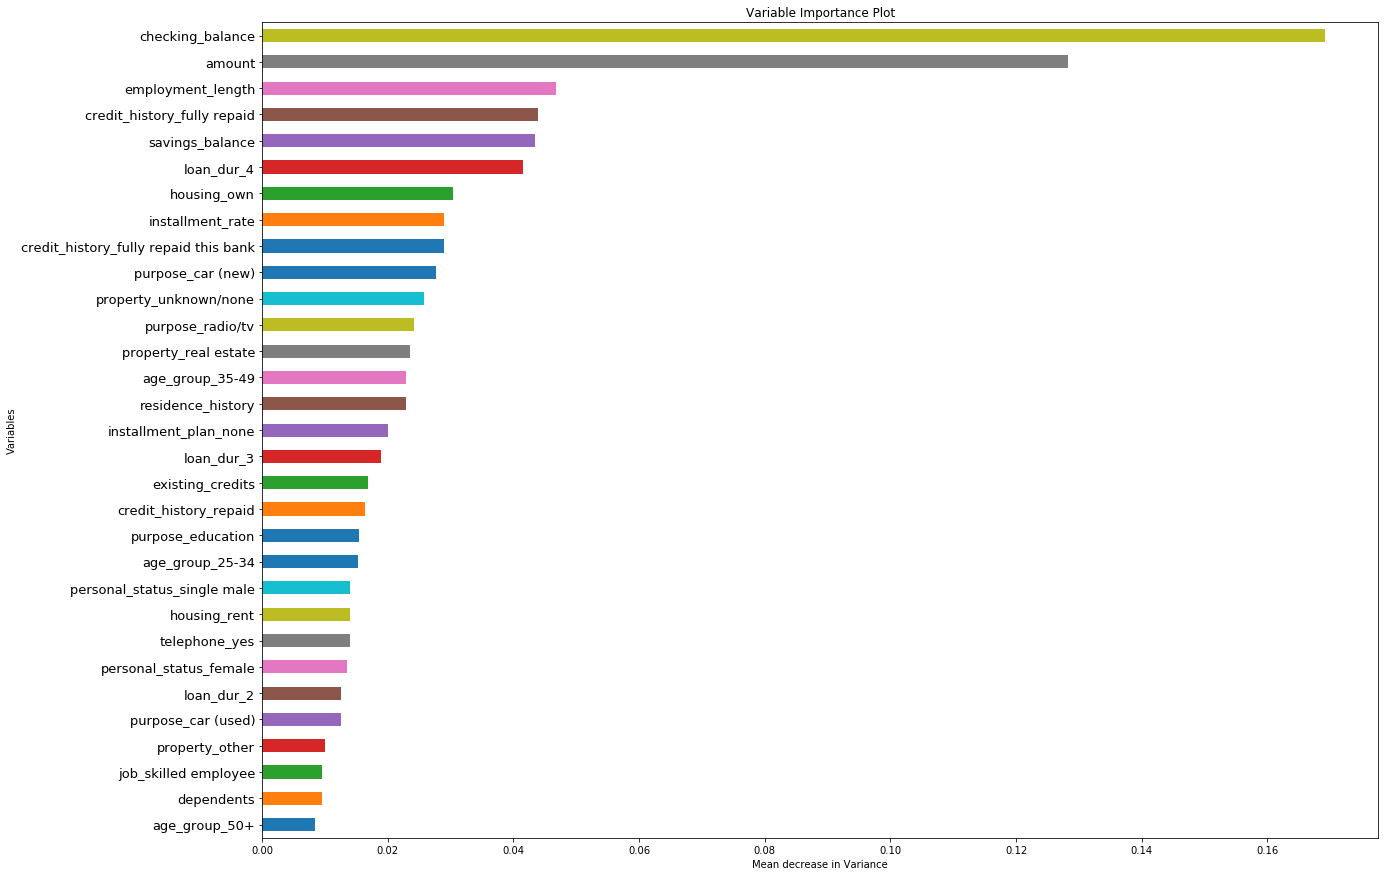

In [55]:
# Plot of Variable importance by mean decrease in gini
model_ranks = pd.Series(rf_fit.feature_importances_,
                        index=x_train.columns, name='Importance').sort_values(ascending=False, inplace=False)
model_ranks.index.name = 'Variables'
top_features = model_ranks.iloc[:31].sort_values(ascending=True,inplace=False)
plt.figure(figsize=(20,15))
ax = top_features.plot(kind='barh')
_ = ax.set_title("Variable Importance Plot")
_ = ax.set_xlabel('Mean decrease in Variance')
_ = ax.set_yticklabels(top_features.index, fontsize=13)
plt.show()

In [56]:
# Adaboost Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
#decision stump is used as a base classifier for AdaBoost
dtree = DecisionTreeClassifier(criterion='gini',max_depth=1)

adabst_fit = AdaBoostClassifier(base_estimator= dtree,
        n_estimators=5000,learning_rate=0.05,random_state=42)

#learning rate and n_estimators have a trade-off
adabst_fit.fit(x_train, y_train)

print ("\nAdaBoost - Train Confusion Matrix\n\n",pd.crosstab(y_train,adabst_fit.predict(x_train),
                                                             rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nAdaBoost  - Train accuracy",round(accuracy_score(y_train,adabst_fit.predict(x_train)),3))
print ("\nAdaBoost  - Train Classification Report\n",classification_report(y_train,adabst_fit.predict(x_train)))

print ("\n\nAdaBoost  - Test Confusion Matrix\n\n",pd.crosstab(y_test,adabst_fit.predict(x_test),
                                                               rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nAdaBoost  - Test accuracy",round(accuracy_score(y_test,adabst_fit.predict(x_test)),3))
print ("\nAdaBoost - Test Classification Report\n",classification_report(y_test,adabst_fit.predict(x_test)))




AdaBoost - Train Confusion Matrix

 Predicted    0    1
Actual             
0          126   83
1           39  452

AdaBoost  - Train accuracy 0.826

AdaBoost  - Train Classification Report
               precision    recall  f1-score   support

           0       0.76      0.60      0.67       209
           1       0.84      0.92      0.88       491

   micro avg       0.83      0.83      0.83       700
   macro avg       0.80      0.76      0.78       700
weighted avg       0.82      0.83      0.82       700



AdaBoost  - Test Confusion Matrix

 Predicted   0    1
Actual            
0          39   52
1          25  184

AdaBoost  - Test accuracy 0.743

AdaBoost - Test Classification Report
               precision    recall  f1-score   support

           0       0.61      0.43      0.50        91
           1       0.78      0.88      0.83       209

   micro avg       0.74      0.74      0.74       300
   macro avg       0.69      0.65      0.67       300
weighted avg       0.

In [57]:
# Gradientboost Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc_fit = GradientBoostingClassifier(loss='deviance',learning_rate=0.05,n_estimators=5000,
                                     min_samples_split=2,min_samples_leaf=1,max_depth=1,random_state=42 )
gbc_fit.fit(x_train,y_train)

print ("\nGradient Boost - Train Confusion Matrix\n\n",pd.crosstab(y_train,gbc_fit.predict(x_train),
                                                                   rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nGradient Boost - Train accuracy",round(accuracy_score(y_train,gbc_fit.predict(x_train)),3))
print ("\nGradient Boost  - Train Classification Report\n",classification_report(y_train,gbc_fit.predict(x_train)))

print ("\n\nGradient Boost - Test Confusion Matrix\n\n",pd.crosstab(y_test,gbc_fit.predict(x_test),
                                                                    rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nGradient Boost - Test accuracy",round(accuracy_score(y_test,gbc_fit.predict(x_test)),3))
print ("\nGradient Boost - Test Classification Report\n",classification_report(y_test,gbc_fit.predict(x_test)))



Gradient Boost - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          125   84
1           38  453

Gradient Boost - Train accuracy 0.826

Gradient Boost  - Train Classification Report
               precision    recall  f1-score   support

           0       0.77      0.60      0.67       209
           1       0.84      0.92      0.88       491

   micro avg       0.83      0.83      0.83       700
   macro avg       0.81      0.76      0.78       700
weighted avg       0.82      0.83      0.82       700



Gradient Boost - Test Confusion Matrix

 Predicted   0    1
Actuall           
0          38   53
1          22  187

Gradient Boost - Test accuracy 0.75

Gradient Boost - Test Classification Report
               precision    recall  f1-score   support

           0       0.63      0.42      0.50        91
           1       0.78      0.89      0.83       209

   micro avg       0.75      0.75      0.75       300
   macro avg       0.71      0.66      0.67